In [50]:
import os
import numpy as np
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
import seaborn as sns
sns.set_style('white')
import dataframe_image as dfi
import pickle
from network_setup import *
from data_setup import *
from EnergyCommunityModel import *
from model_eval import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

# set up home path
#home_path = os.getcwd()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
# set up simulation scope
input_cdir_timestamp = '2022 11 09 10h46m56s'
with open('2022_11_13_filepaths.pickle', 'rb') as handle:
    paths = pickle.load(handle)
date_t = '2022 11 17 16h00m'
n_steps = 5

# define comprehensive scenario settings for analysis
scenario_sc0 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [False]}
scenario_sc1 = {'seasons': ['summer', 'winter'], 'p2p_options': [False], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_sc2 = {'seasons': ['summer', 'winter'], 'p2p_options': [True], 'pr_years': [2019, 2022], 'pr_dynamic_options': [True]}
scenario_dict = {'scenario_0': scenario_sc0, 'scenario_1': scenario_sc1, 'scenario_2': scenario_sc2}

# manually define all scenarios
scenario_0 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_1 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [False]}
scenario_2 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}
scenario_3 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [False]}

scenario_4 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_5 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_6 = {'seasons': ['summer'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_7 = {'seasons': ['winter'], 'p2p_options': [False], 'pr_years': [2022], 'pr_dynamic_options': [True]}

scenario_8 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_9 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2019], 'pr_dynamic_options': [True]}
scenario_10 = {'seasons': ['summer'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}
scenario_11 = {'seasons': ['winter'], 'p2p_options': [True], 'pr_years': [2022], 'pr_dynamic_options': [True]}

In [53]:
# run selected scenario
scenario_t = scenario_8
batch_runner(paths, sc_dict=scenario_t, n_steps = n_steps, input_cdir_timestamp=input_cdir_timestamp, output_dir_timestamp=date_t)

--- 2022 11 17 15h39m_mdf,adf_season_summer_p2p_True_year_2019_dyn_True: Step 0/5 done ---
--- 2022 11 17 15h39m_mdf,adf_season_summer_p2p_True_year_2019_dyn_True: Step 1/5 done ---
--- 2022 11 17 15h39m_mdf,adf_season_summer_p2p_True_year_2019_dyn_True: Step 2/5 done ---
--- 2022 11 17 15h39m_mdf,adf_season_summer_p2p_True_year_2019_dyn_True: Step 3/5 done ---
--- 2022 11 17 15h39m_mdf,adf_season_summer_p2p_True_year_2019_dyn_True: Step 4/5 done ---
--- SUCCESS: 2022 11 17 15h39m_mdf,adf_season_summer_p2p_True_year_2019_dyn_True stored. Total simulation time: 0:01:25 ---


In [56]:
data_dict, seasons, years, p2p_bool, pr_bool = get_data_and_scenario_info(paths, date_t, scenario_t)
mdf, adf = get_mdf(data_dict_sc=data_dict, year=years[0], season=seasons[0], adf_too=True)
mdf

,price_g_d,price_g_s,price_n_level,price_n_d,price_n_s,costs_all,costs_prosumer,costs_consumer,costs_gini,g_d_all,...,n_d_consumer,n_s_all,d_bl_all,d_bl_prosumer,d_bl_consumer,gco2e_prosumer,gco2e_consumer,co2e_gini,hb_soc_all,ev_soc_all
2019-06-01 00:00:00,21.81300,6.93,0 14.756100 1 16.123854 2 17.491608 3...,21.594870,13.914870,669.552741,478.681818,190.870923,0.514551,30.581577,...,0.0,0.0,0.581577,0.285807,0.295770,12412.728823,4948.583434,0.514506,4.5,24.0
2019-06-01 00:15:00,21.79775,6.93,0 14.756100 1 16.120835 2 17.485569 3...,21.579773,13.899773,13.703171,6.502667,7.200505,0.506406,0.628651,...,0.0,0.0,0.628651,0.298318,0.330332,167.654442,185.646381,0.401498,4.5,24.0
2019-06-01 00:30:00,21.78250,6.93,0 14.756100 1 16.117815 2 17.479530 3...,21.564675,13.884675,14.760765,6.748622,8.012143,0.497717,0.677643,...,0.0,0.0,0.677643,0.309819,0.367825,172.349647,204.618053,0.379050,4.5,24.0
2019-06-01 00:45:00,21.76725,6.93,0 14.756100 1 16.114795 2 17.473491 3...,21.549578,13.869578,33.967617,16.626886,17.340731,0.469894,1.560492,...,0.0,0.0,1.560492,0.763849,0.796643,420.564321,438.620496,0.664248,4.5,24.0
2019-06-01 01:00:00,21.75200,6.93,0 14.756100 1 16.111776 2 17.467452 3...,21.534480,13.854480,45.110846,22.491038,22.619808,0.439730,2.073871,...,0.0,0.0,2.073871,1.033976,1.039896,563.392185,566.617814,0.729379,4.5,24.0


In [7]:
# calculate certain measure for certain scenario and save df as png
m_dict = calculate_measure(paths, date, scenario_dict=scenario_2, measure='stability')
export_measure_calculation(paths, m_dict)

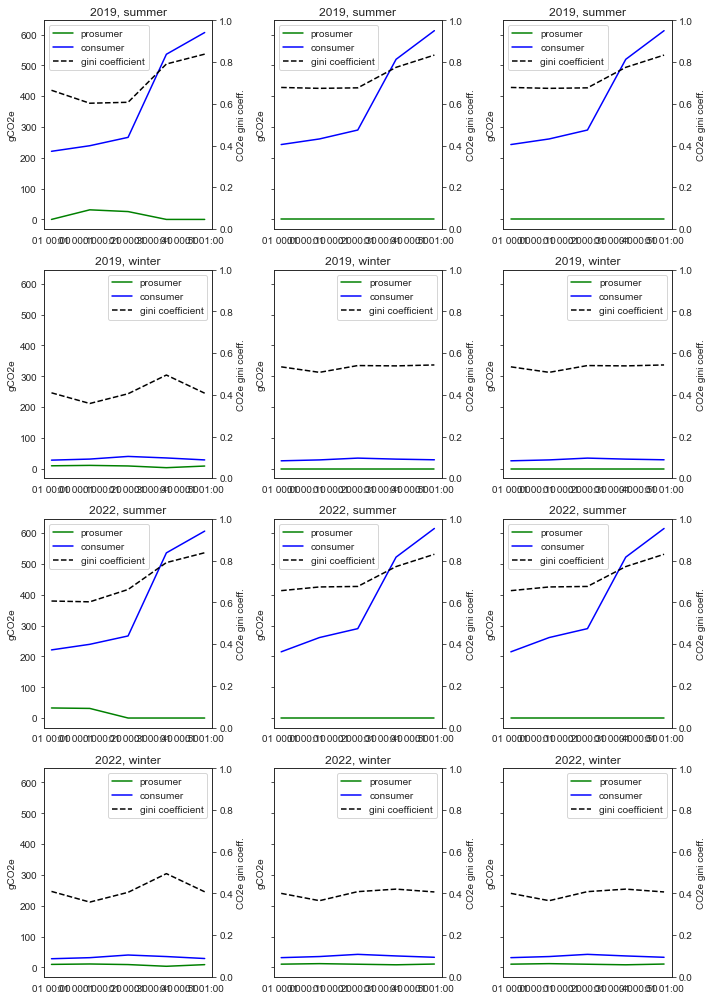

In [31]:
fig, ax = plot_all_scenarios(paths, date, scenario_dict, measure='sustainability')